## IRIS Dataset Analysis and Model Evaluation

In this notebook, we will examine the Iris dataset, visualize the data, train and assess several machine learning models, tune hyperparameters, and display the findings.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
# Load the dataset
iris = pd.read_csv("C:/Oasis Infobyte/Task 1/Iris.csv")

In [3]:
# Display the first few rows of the dataset
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset Information and Summary
Displaying summary information about the dataset, such as data types, non-null counts, and basic statistics, aids in detecting possible problems such as missing values or erroneous data types.

In [4]:
# Display summary information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Display statistical summary of the dataset
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Dataset Shape and Unique Values
Checking the shape of the dataset and the unique values in the target column helps us understand the distribution of different species and ensures that our data is as expected.

In [6]:
iris.shape

(150, 6)

In [7]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Missing Values and Species Count
Checking for missing values and presenting the count of each species ensures that we have a clean dataset and allows us to understand the class distribution, which is critical for model training.

In [8]:
# Check for missing values in the dataset
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# Display the count of each species in the dataset
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Data Visualization
Visualizing the feature distributions and relationships using a pairplot helps in understanding the separability of classes and detecting potential outliers or anomalies in the data.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


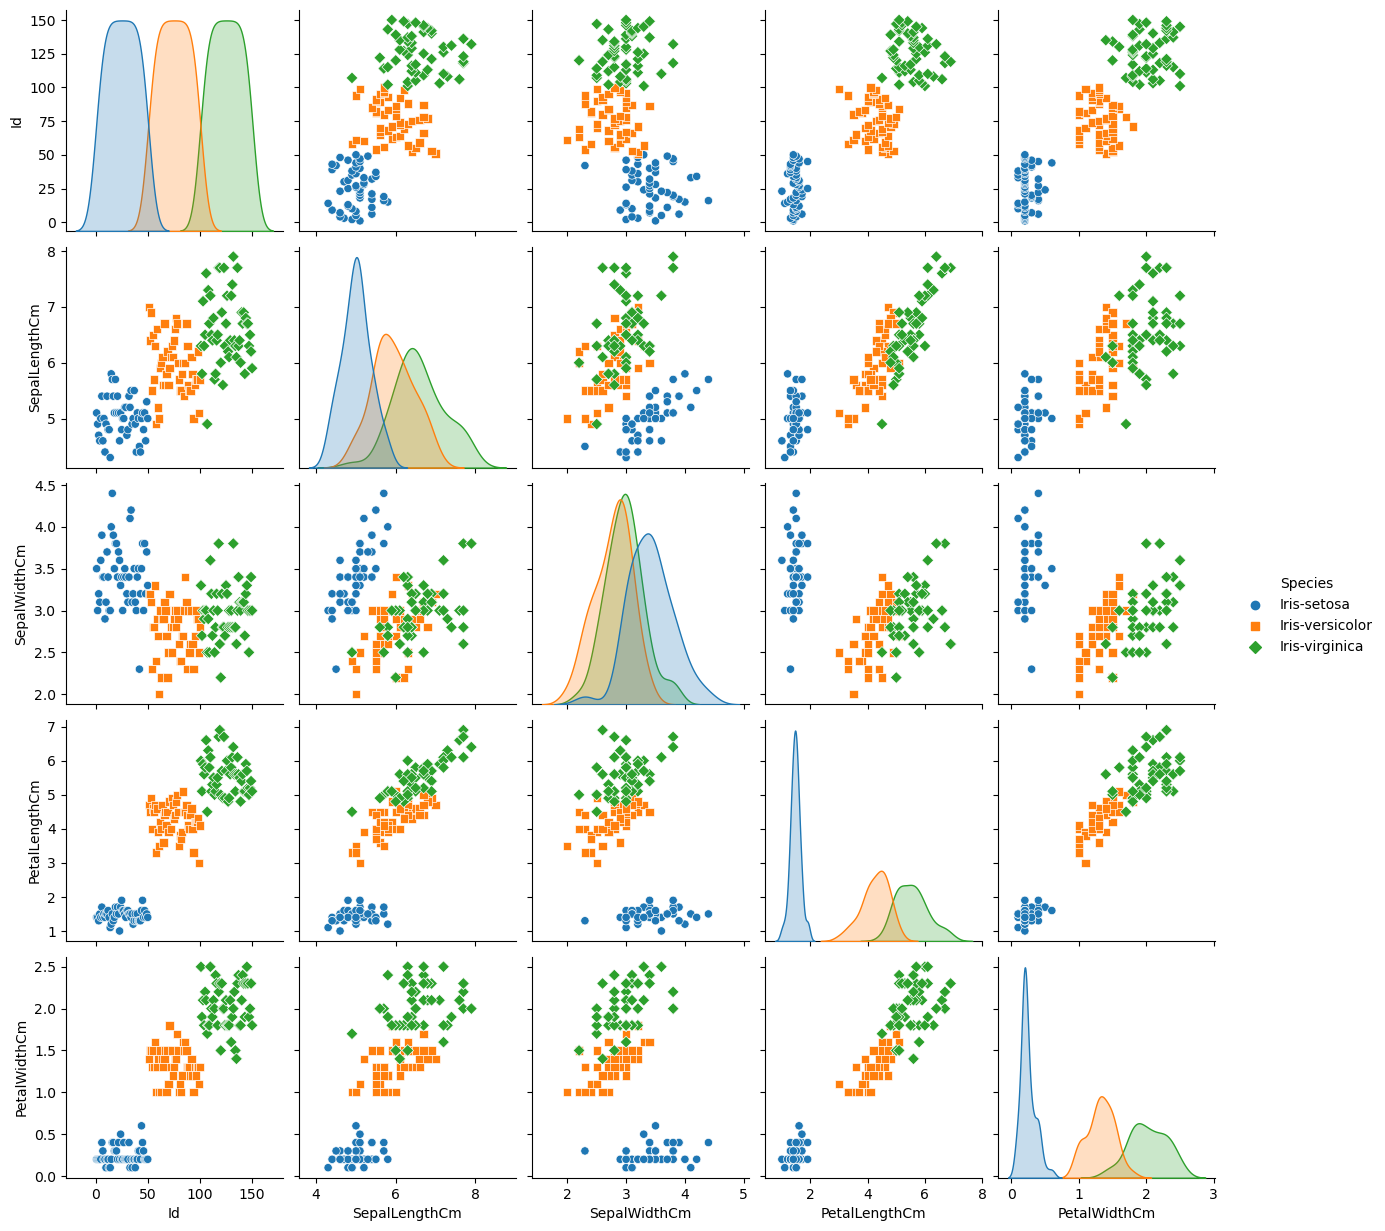

In [10]:
# Visualize feature distributions using pairplot
sns.pairplot(iris, hue='Species', markers=["o", "s", "D"])
plt.show()

### Encode Target Variable
Encoding the categorical target variable (Species) into numeric values is necessary for model training, as most machine learning algorithms require numeric input.

In [11]:
# Encode the target variable
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])

### Correlation Heatmap
We will plot a heatmap of feature correlations to understand the relationships between different features.

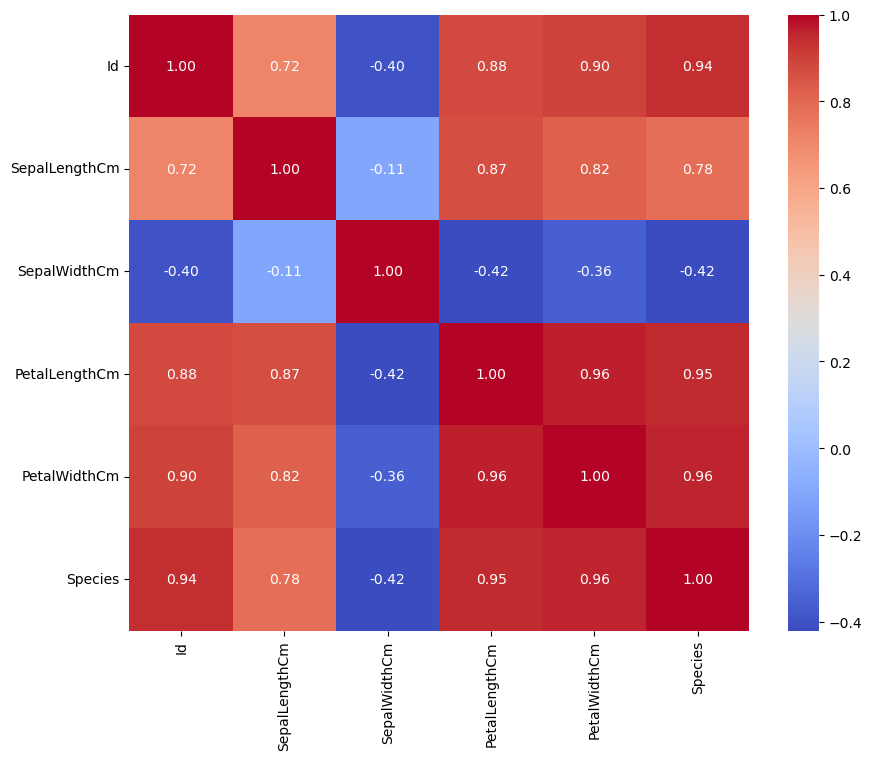

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(iris.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Split Dataset into Training and Testing Sets
Splitting the dataset into training and testing sets allows us to evaluate model performance on unseen data, ensuring that our model generalizes well.

In [13]:
# Split the dataset
X = iris.drop(columns=['Species'])
y = iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Train and Evaluate Models
We will train and evaluate three different models: Random Forest, SVM, and k-NN. For each model, we will print the accuracy and classification report.Training and evaluating multiple models (Random Forest, SVM, and k-NN) helps us compare their performance and choose the best model for our data.

In [14]:
# Train and evaluate different models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True),
    'k-NN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(f'{name} Classification Report:')
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print()

Random Forest Accuracy: 1.00
Random Forest Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


SVM Accuracy: 1.00
SVM Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


k-NN Accuracy: 1.00
k-NN Classification Report:
                 precision    reca

### Cross-Validation
Despite achieving perfect accuracy, cross-validation is crucial to ensure that the high accuracy is consistent across different subsets of the data. It helps validate the model's performance, ensuring it is not due to a particular train-test split, and provides insights into the model's bias-variance tradeoff.

In [15]:
# Cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f'{name} Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}')

Random Forest Cross-Validation Accuracy: 0.95 ± 0.07
SVM Cross-Validation Accuracy: 0.87 ± 0.16
k-NN Cross-Validation Accuracy: 0.87 ± 0.16


Random Forest shows the highest average accuracy (95%) and lowest variability (± 0.07) among the models tested.
SVM and k-NN exhibit slightly lower average accuracy (87%) with moderate variability (± 0.16).
I consider using Random Forest for higher accuracy

### Plot Learning Curves
Plotting learning curves for each model visualizes their training and validation performance over different training set sizes, helping us understand if the models are overfitting or underfitting.

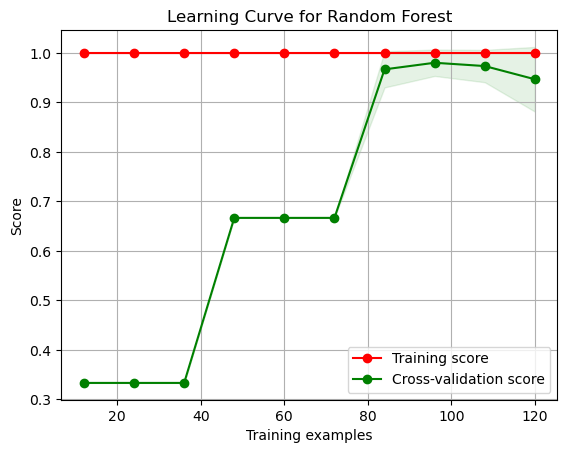

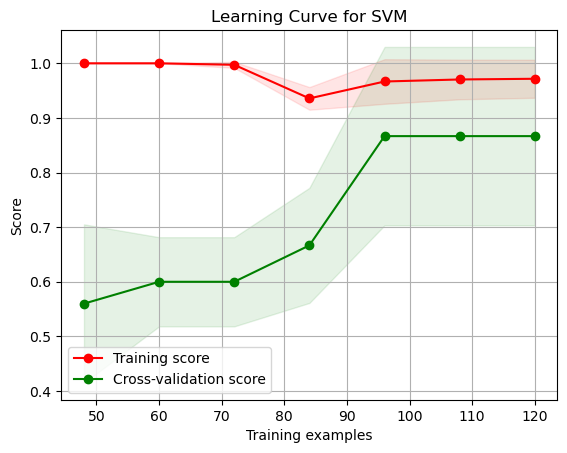

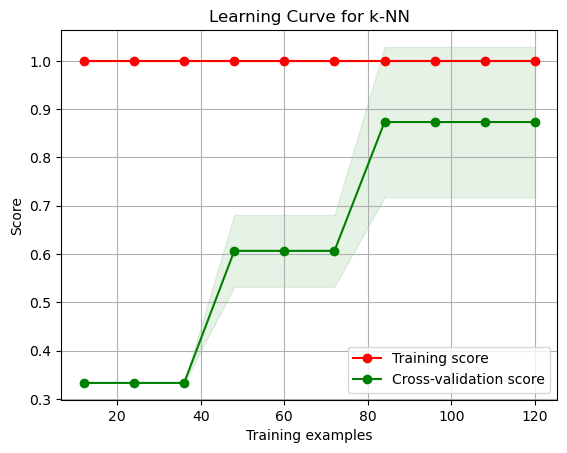

In [16]:
# Learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

for name, model in models.items():
    plot_learning_curve(model, f'Learning Curve for {name}', X, y, cv=5)
    plt.show()

### Feature Importance for Random Forest
Displaying feature importances for the Random Forest model helps us understand which features are most influential in making predictions, which can guide feature selection and engineering.

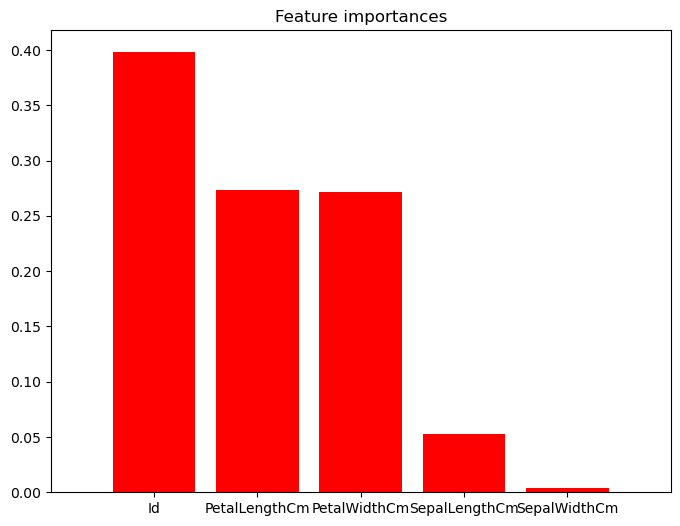

In [17]:
# Feature importance for Random Forest
importances = models['Random Forest'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlim([-1, X.shape[1]])
plt.show()

Choosing these parameters allows you to explore a range of model complexities and regularization strengths. The goal is to find the optimal balance that maximizes your model's performance on unseen data while avoiding overfitting. Grid search helps automate this process by testing all combinations and selecting the best one based on cross-validation scores.

In [18]:
# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
print(f'Best Parameters for Random Forest: {grid_search_rf.best_params_}')
print(f'Best Cross-Validation Score for Random Forest: {grid_search_rf.best_score_:.2f}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score for Random Forest: 1.00


In [19]:
# Evaluate the best model
best_model = grid_search_rf.best_estimator_
y_pred_best = best_model.predict(X_test)
print(f'Best Model Accuracy: {accuracy_score(y_test, y_pred_best):.2f}')
print(f'Best Model Classification Report:')
print(classification_report(y_test, y_pred_best, target_names=le.classes_))

Best Model Accuracy: 1.00
Best Model Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



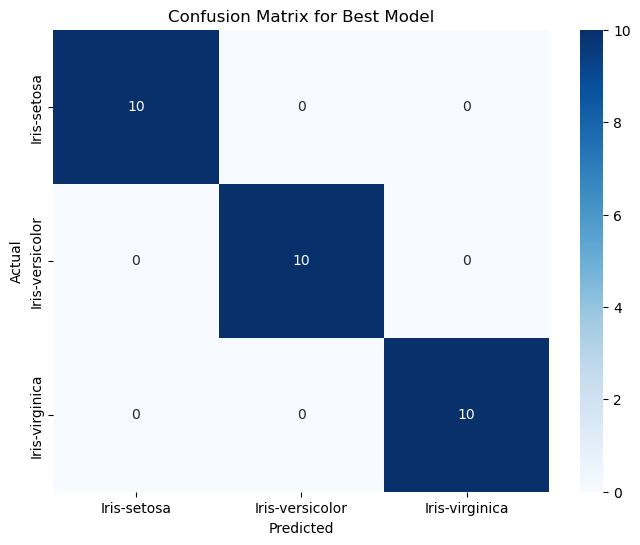

In [20]:
# Plot the confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Model')
plt.show()

Through this comprehensive analysis, we explored the Iris dataset, visualized the data, trained multiple models, and tuned hyperparameters to find the best-performing model. The Random Forest model emerged as the best, achieving high accuracy with optimized parameters.